# KernelKlassifier: Predicting Pumpkin Seed Types with KNN

#### Group 61 Project Report

Alifais Farrel **Ramdhani**, Blasius Halley Theo **Boniarga**, Helmi **Rouf**, Jingruo **Dai**

## Introduction

Pumpkin seeds, derived from the Cucurbita pepo plant, have gained widespread popularity as a highly nutritious and beneficial food source. Their unique characteristics, including size, color, and flavor, not only contribute to their culinary appeal but also serve as potential indicators of different pumpkin seed varieties or cultivars. Understanding the genetic diversity among pumpkin seeds and optimizing cultivation practices specific to each seed class can significantly impact crop productivity and meet consumer preferences.

In recent years, the effectiveness of machine learning techniques in classifying agricultural products based on their unique physical attributes has been demonstrated. These techniques offer the potential to develop accurate and user-friendly classification systems for pumpkin seeds, which exhibit distinct characteristics such as eccentricity, roundness, aspect ratio, and compactness for each subspecies. Such classification systems provide valuable insights into the genetic diversity of pumpkin seeds and enable informed decision-making in cultivation practices. Among the various machine learning algorithms, the K-nearest neighbors (KNN) algorithm stands out as a simple and intuitive approach for classification, relying on the similarity of data points.

Therefore, the research question for this study is: Are the variables representing the unique physical shape such as eccentricity, roundness, aspect ratio, and compactness of the pumpkin seeds sufficient to provide high accuracy for predicting the type of pumpkin seeds (Çerçevelik and Ürgüp Sivrisi) by using the K-nearest neighbors algorithm?

This research project aims to explore the potential of using physical shape variables as predictors for accurately classifying pumpkin seed types, with a specific focus on the Çerçevelik and Ürgüp Sivrisi varieties. These two varieties exhibit distinct characteristics and are commonly cultivated in different regions. By applying the KNN algorithm, we seek to assess whether physical shape attributes alone are sufficient to achieve high accuracy in classifying pumpkin seeds into their respective types.

To achieve our objective, we will utilize a dataset obtained from Kaggle's website. The dataset comprises observational data in an Excel format, containing 13 columns and 2500 rows. These columns encompass a range of relevant attributes, including physical shape variables, color, size, and potentially additional characteristics such as flavor profiles.

Through a comprehensive analysis of this dataset, we aim to investigate the relationship between physical shape attributes and pumpkin seed types. Additionally, we will assess the suitability of the KNN algorithm in accurately predicting the seed type based on these physical characteristics. The findings of this research will contribute to a deeper understanding of the genetic diversity present in pumpkin seed varieties and provide valuable insights for optimizing cultivation practices specific to each seed class.

## Method & Results

### Data Wrangling and Exploration

#### Data loading and cleaning

In [1]:
# Import the necessary library

library(GGally)
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(readxl)
options(repr.matrix.max.rows = 6)

# Setting seed for the whole document for reproducibility
set.seed(2023)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipe

In [2]:
# Loading dataset

url <- "https://raw.githubusercontent.com/FarrelRamdhani/DSCI-100-Team-Project/blasius/Pumpkin_Seeds_Dataset.csv"
pumpkin_data_raw <- read_csv(url)

pumpkin_data_raw

Rows: 2500 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (12): Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


<div align="center"> Table 1: Pumpkin raw data

It can be seen above that the data is already tidy, therefore there isn't much for data wrangling.

In [3]:
# Initial data cleaning (removing NA) and factoring the class

pumpkin_data <- pumpkin_data_raw |>
    mutate(Class = as.factor(Class)) |>
    drop_na()
pumpkin_data

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


<div align="center"> Table 2: Pumpkin clean data

In [4]:
# Data checking and quantity analysis

count_pumpkin <- group_by(pumpkin_data, Class) |>
                    summarize(count = n())

count_pumpkin

Class,count
<fct>,<int>
Çerçevelik,1300
Ürgüp Sivrisi,1200


<div align="center"> Table 3: Pumpkin count data

From the table above, it can be seen that the pumpkin data is adequately equal, hence we don't need to cut or balanced out the data.

#### Data splitting

In this project, we decided to split the data based on total parameter used. According to Joseph (2022), the ratio used for splitting the data for training and testing is $\sqrt p : 1$ where $p$ is the total parameter used. For our data exploration and visualization purposes, we assume that we will use all of the parameter thus our ratio is $\sqrt 12: 1$ or $3.464 : 1$ (78 percent goes to training and 22 percent goes to testing). Further splitting will be discussed after selecting the parameter used for this project.

In [5]:
pumpkin_split <- initial_split(pumpkin_data, prop = 0.78 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
80151,1088.349,420.8842,244.2649,80854,319.4549,0.8144,0.9913,0.7285,0.8503,1.7231,0.7590,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60387,1016.508,433.2884,178.2834,60938,277.2853,0.9114,0.9910,0.6202,0.7344,2.4303,0.6400,Ürgüp Sivrisi
79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi


<div align="center"> Table 4 & 5: Pumpkin training and testing data

#### Pumpkin data visual analysis

Visual analysis was conducted for data visualization and selecting the parameter that will be used in this project. Our parameter selecting was conducted by visual analysis for clustering pattern that would be useful in K-NN classification and by analyzing the correlation of each variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



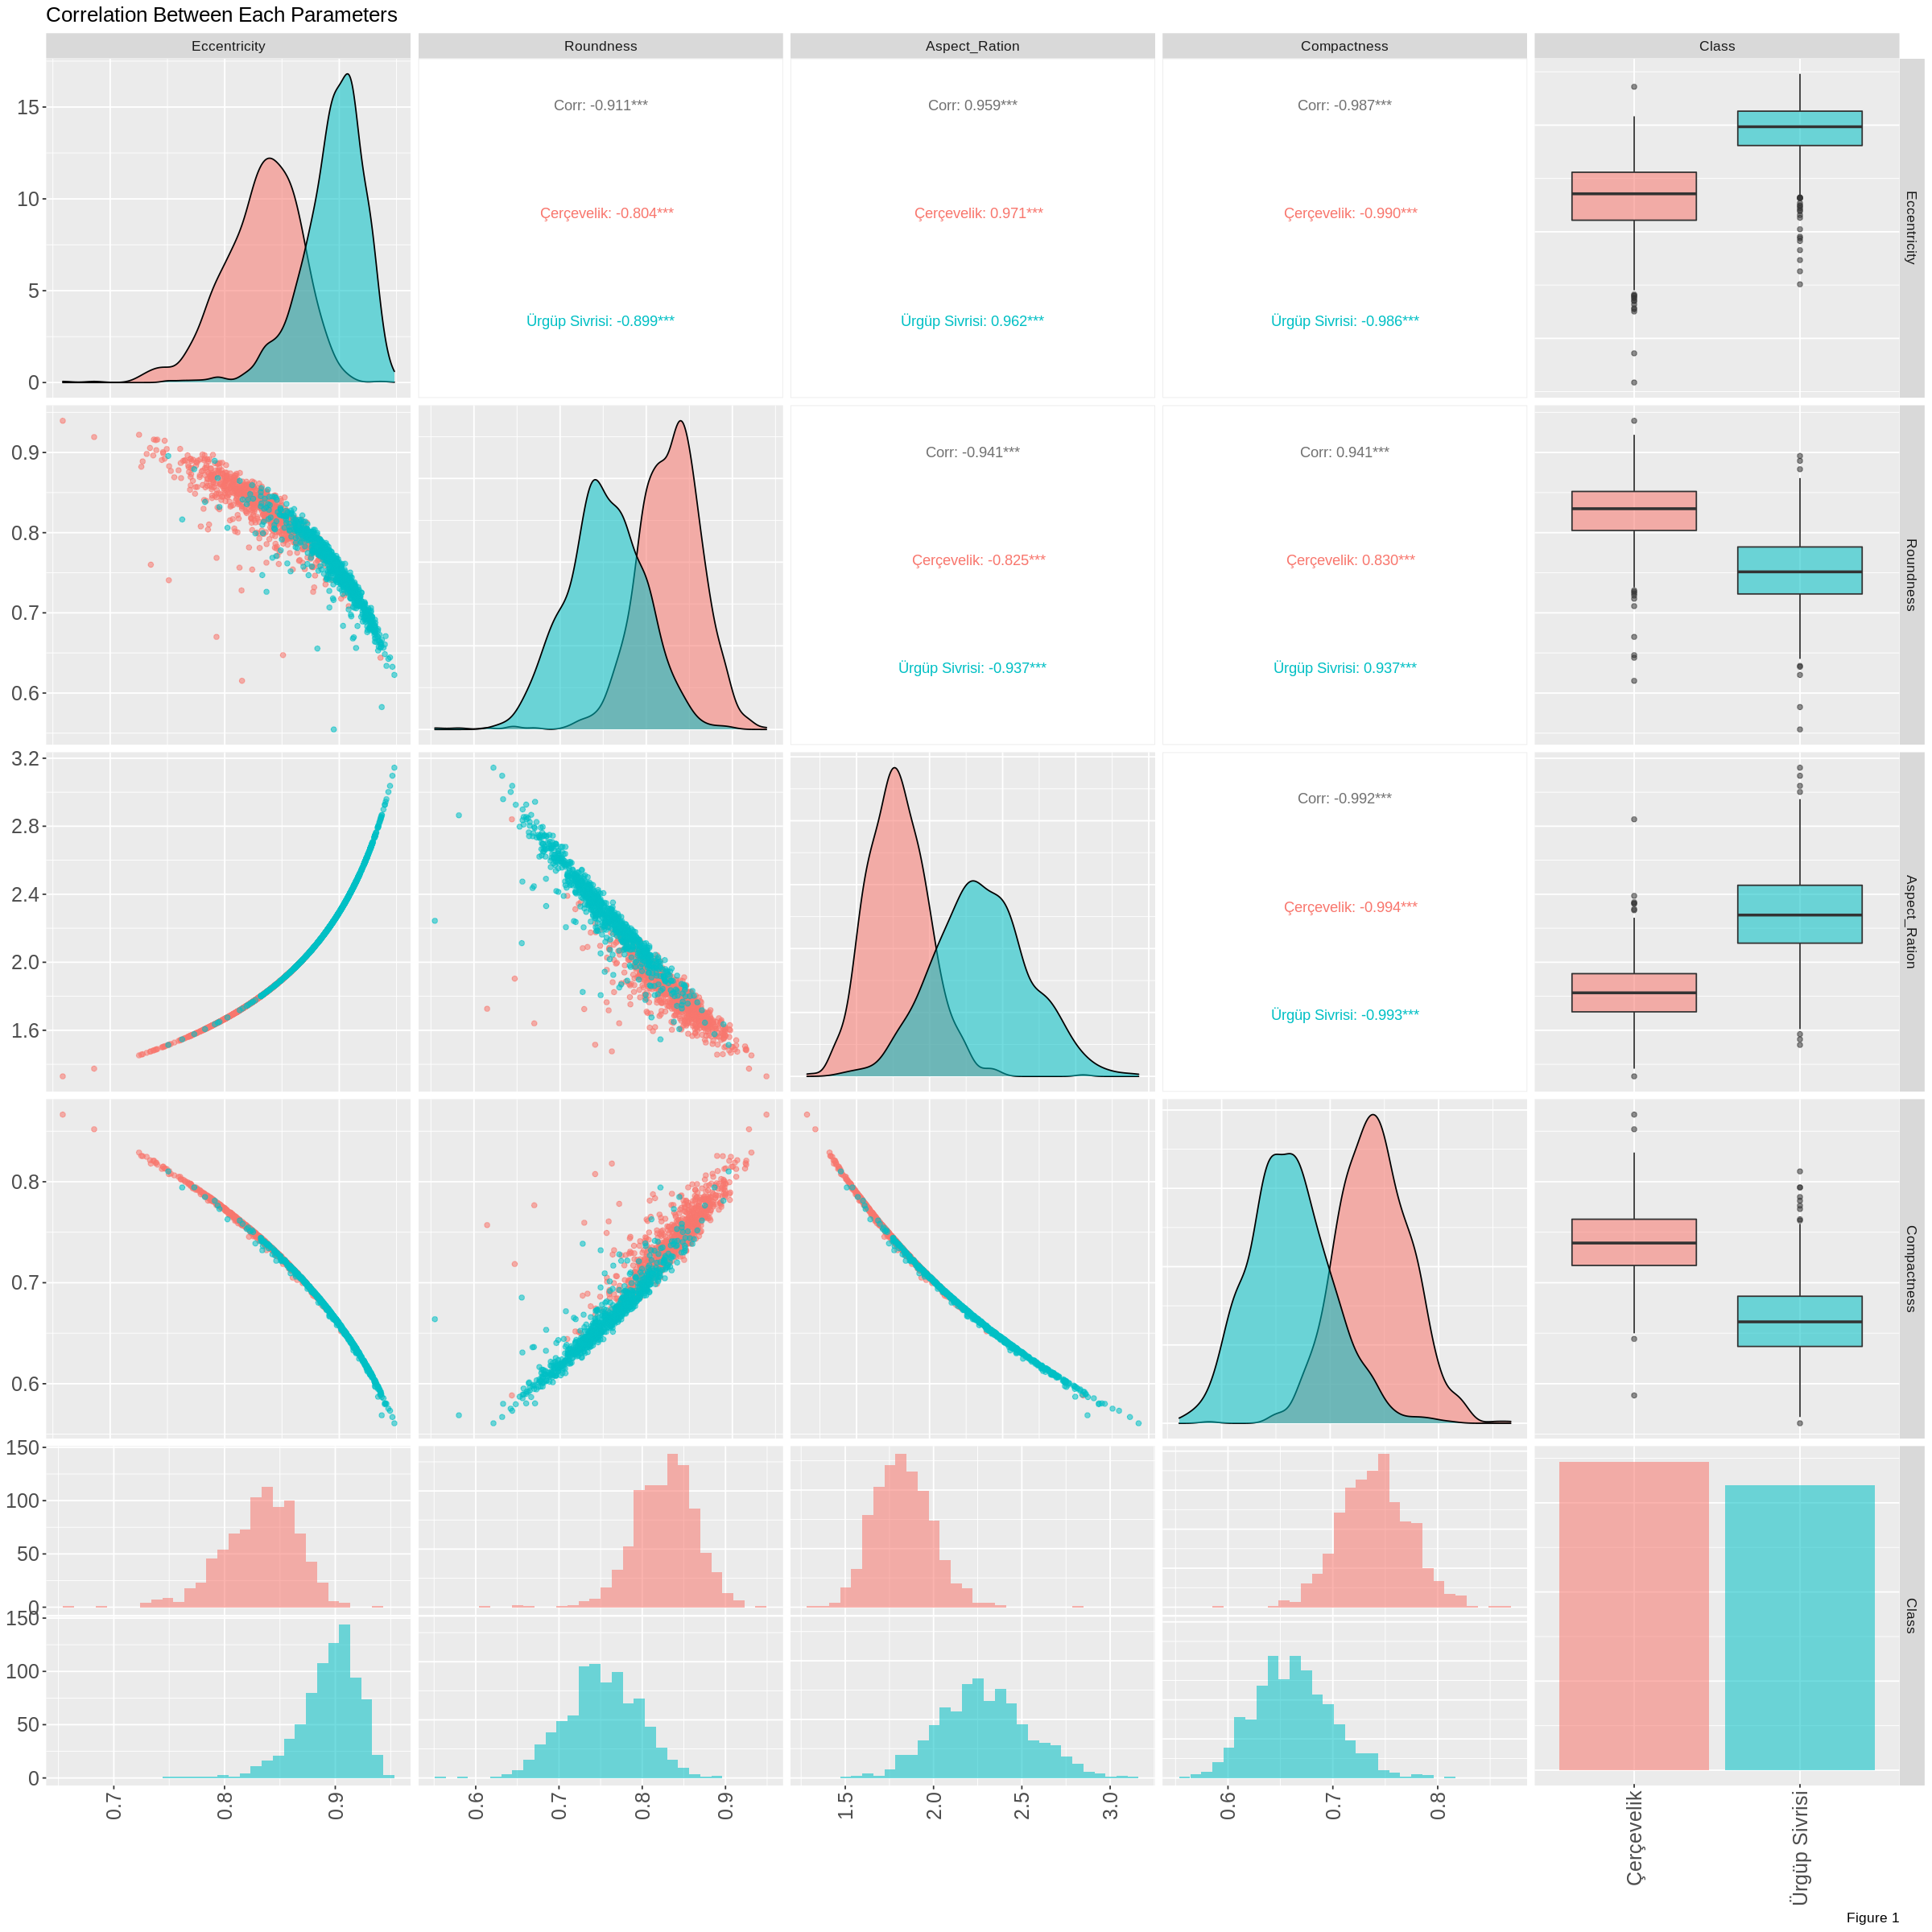

In [30]:
# Setting the plot width 
options(repr.plot.width=20, repr.plot.height=20)

# Pairwise comparison analysis of the multivariable data
train_pumpkin |>
    ggpairs(aes(color=Class, alpha=0.01), title = "Correlation Between Each Parameters") +
        theme(axis.text = element_text(size = 15),
             text=element_text(size=13), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(caption = "Figure 1")

From the visualization above (figure 1) and observing the correlation matrix, we decided to choose eccentricity, roundness, aspect ratio, and compactness as our parameters. The rationale behind selecting these specific four variables was based on their ability to exhibit distinct values for each species of pumpkin seeds, in contrast to other variables that do not offer such differentiation. The accompanying plot strengthens this decision by visually depicting the distribution of data points in red and blue colors when these four parameters are plotted on the y-axis. Notably, the plot reveals a noticeable pattern where the red points tend to be concentrated at the top while the blue points predominantly occupy the bottom, or vice versa, indicating a clear distinction between the two species based on these variables. This distinctiveness in parameter values for each class has the potential to enhance the accuracy of the model, as emphasized by Batista & Silva (2009).

#### Selected data splliting

We further select the data from our main dataset and redo the splitting by using Joseph (2022) formula of $\sqrt p : 1$ in which we get $\sqrt 4 : 1$ or $2 : 1$

In [7]:
pumpkin_data_select <- select(pumpkin_data, Eccentricity, Roundness, Aspect_Ration, Compactness, Class)

pumpkin_data_select

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.7376,0.8963,1.4809,0.8207,Çerçevelik
0.8275,0.8440,1.7811,0.7487,Çerçevelik
0.8749,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮
0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi
0.9130,0.7185,2.4513,0.6359,Ürgüp Sivrisi
0.8621,0.7933,1.9735,0.7104,Ürgüp Sivrisi


<div align="center"> Table 6: Pumpkin selected data

In [8]:
pumpkin_split <- initial_split(pumpkin_data_select, prop = 2/3 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.7376,0.8963,1.4809,0.8207,Çerçevelik
0.8275,0.8440,1.7811,0.7487,Çerçevelik
0.8749,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮
0.9101,0.7444,2.4134,0.6433,Ürgüp Sivrisi
0.9130,0.7185,2.4513,0.6359,Ürgüp Sivrisi
0.8621,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.8187,0.8338,1.7413,0.7557,Çerçevelik
0.8215,0.8480,1.7535,0.7522,Çerçevelik
0.8646,0.7957,1.9903,0.7067,Çerçevelik
⋮,⋮,⋮,⋮,⋮
0.8863,0.7626,2.1594,0.6774,Ürgüp Sivrisi
0.9340,0.6672,2.7996,0.5973,Ürgüp Sivrisi
0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi


<div align="center"> Table 7 & 8: Pumpkin selected training and testing data

#### Further selected data visualization and analysis

We then further plots the selected parameters that show a really strong relationship among all chosen parameters for further visualization analysis and calculating the maximum, minimum, and average of the training dataset. 

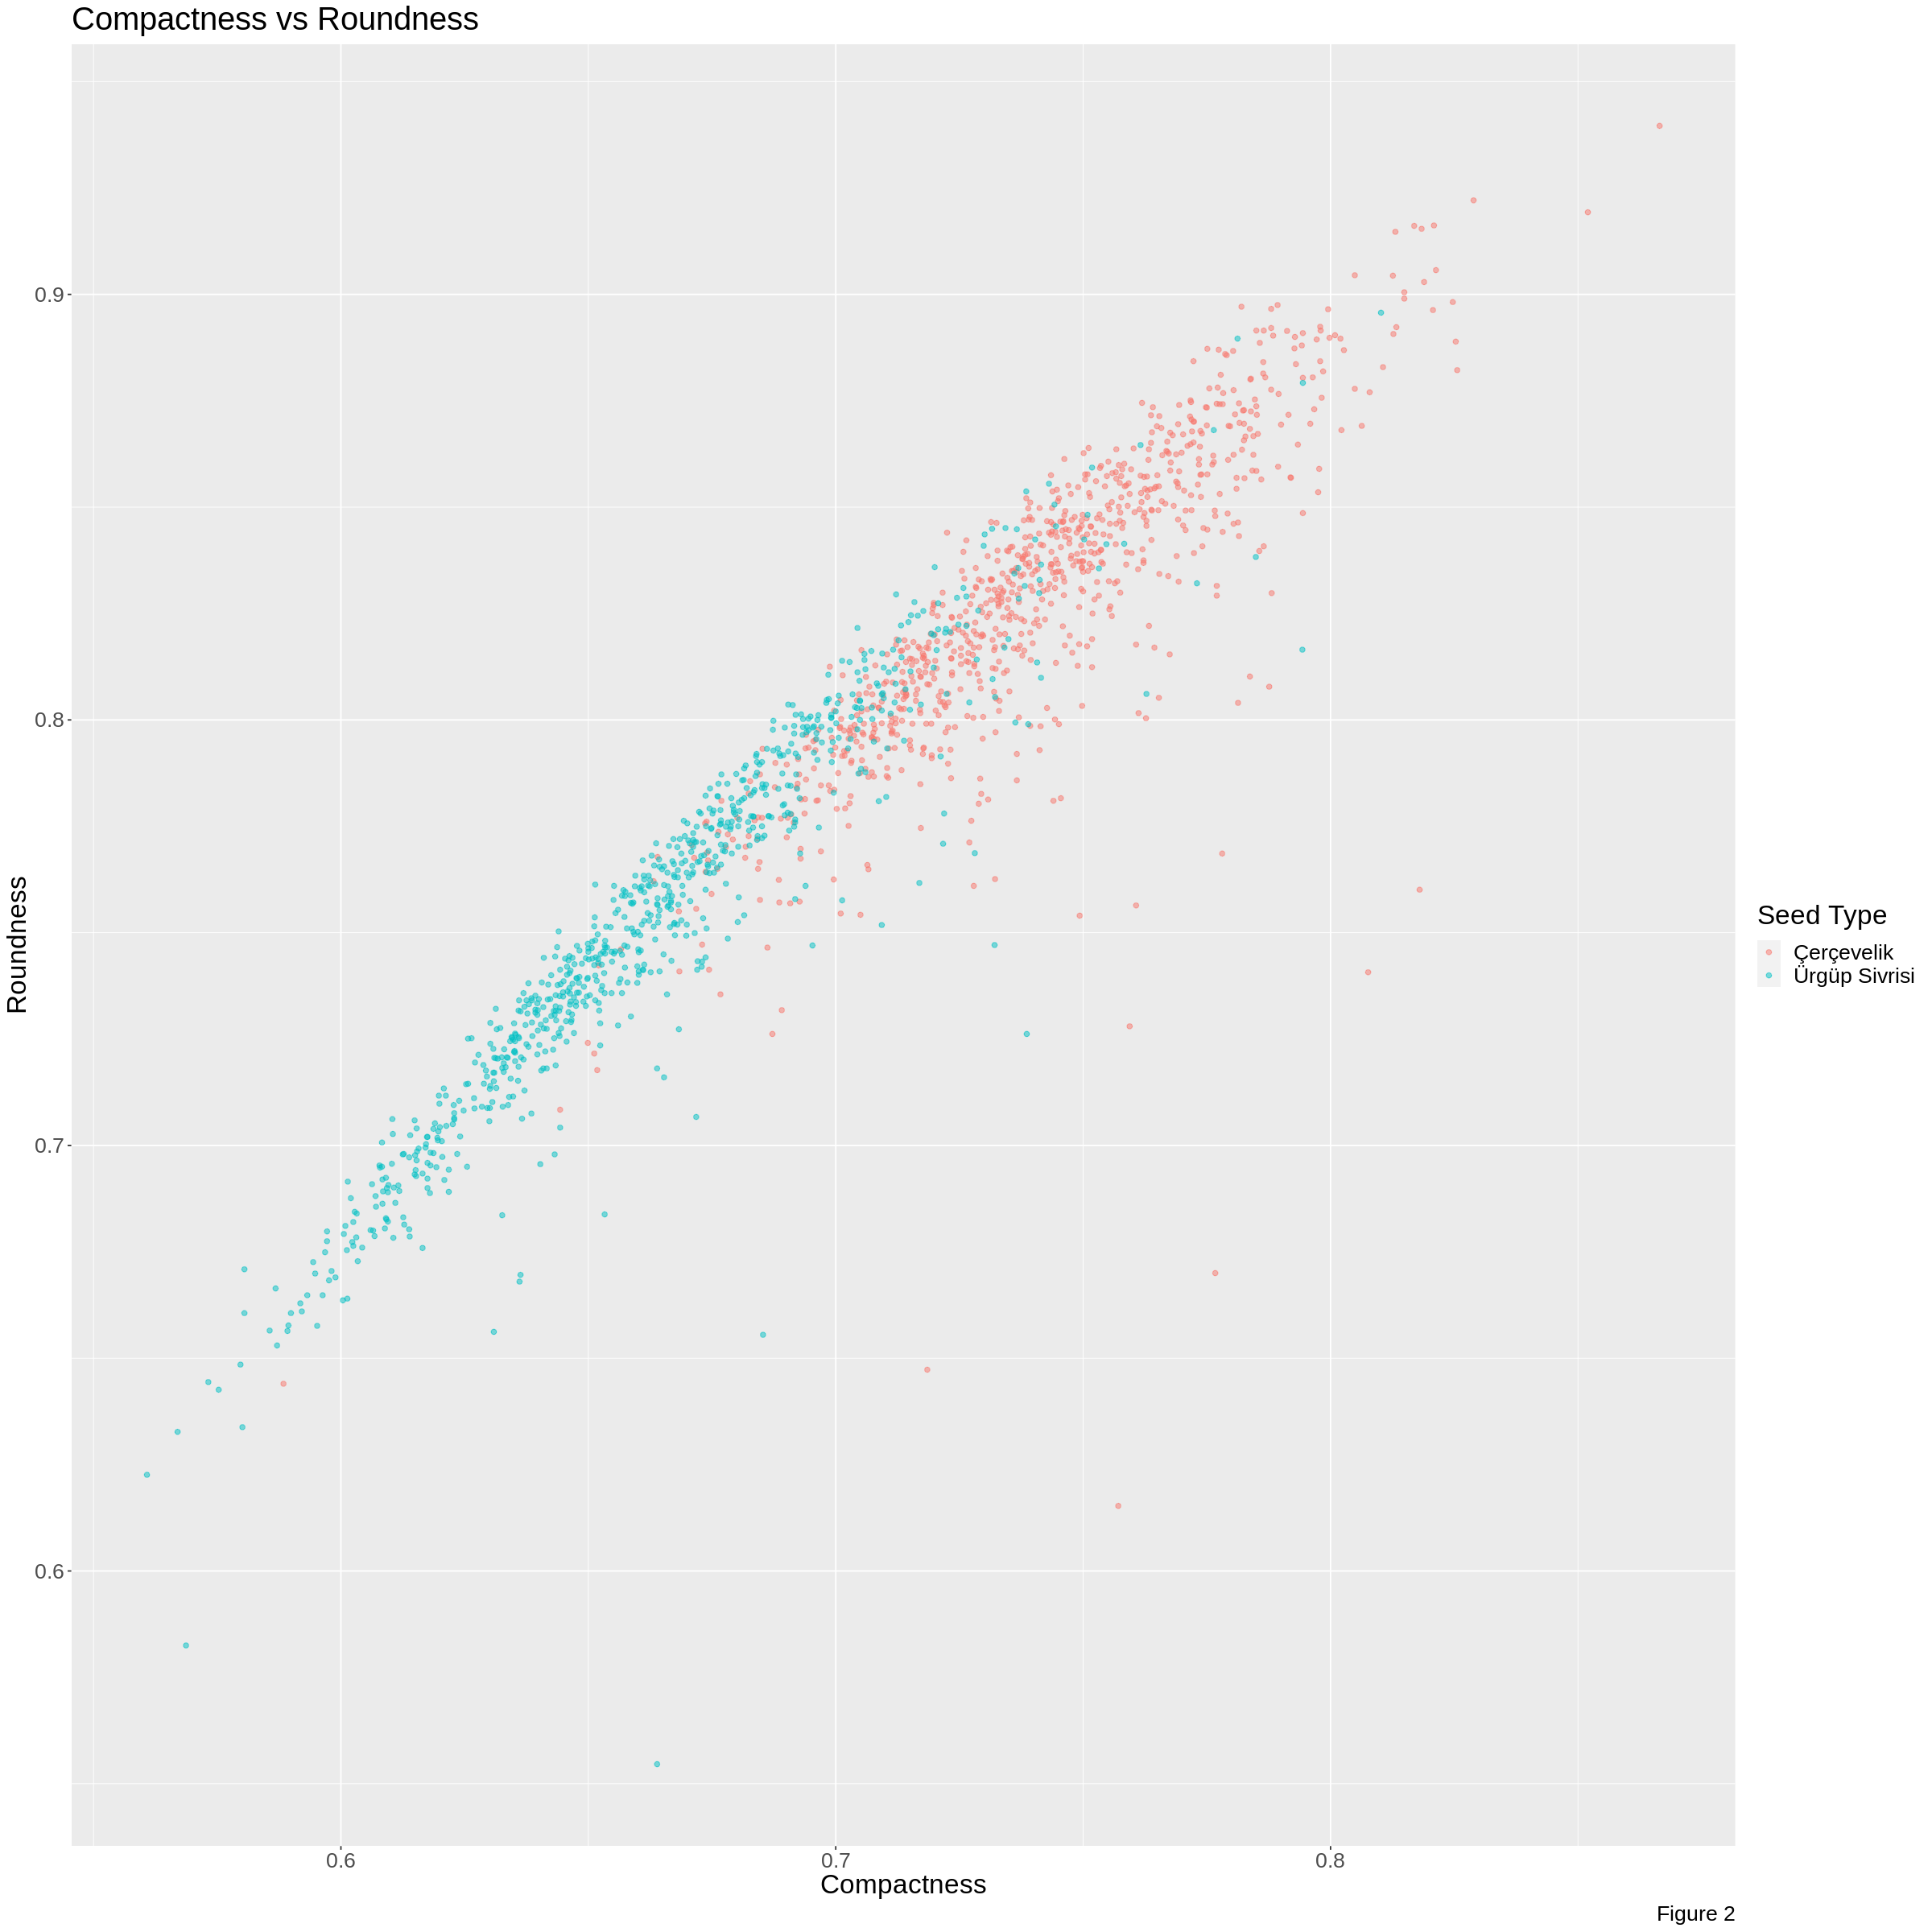

In [9]:
pumpkin_plot_1 <- ggplot(train_pumpkin, aes(x = Compactness, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Compactness", y = "Roundness", color = "Seed Type", title="Compactness vs Roundness", caption = "Figure 2") +
                    theme(text=element_text(size=20))

pumpkin_plot_1

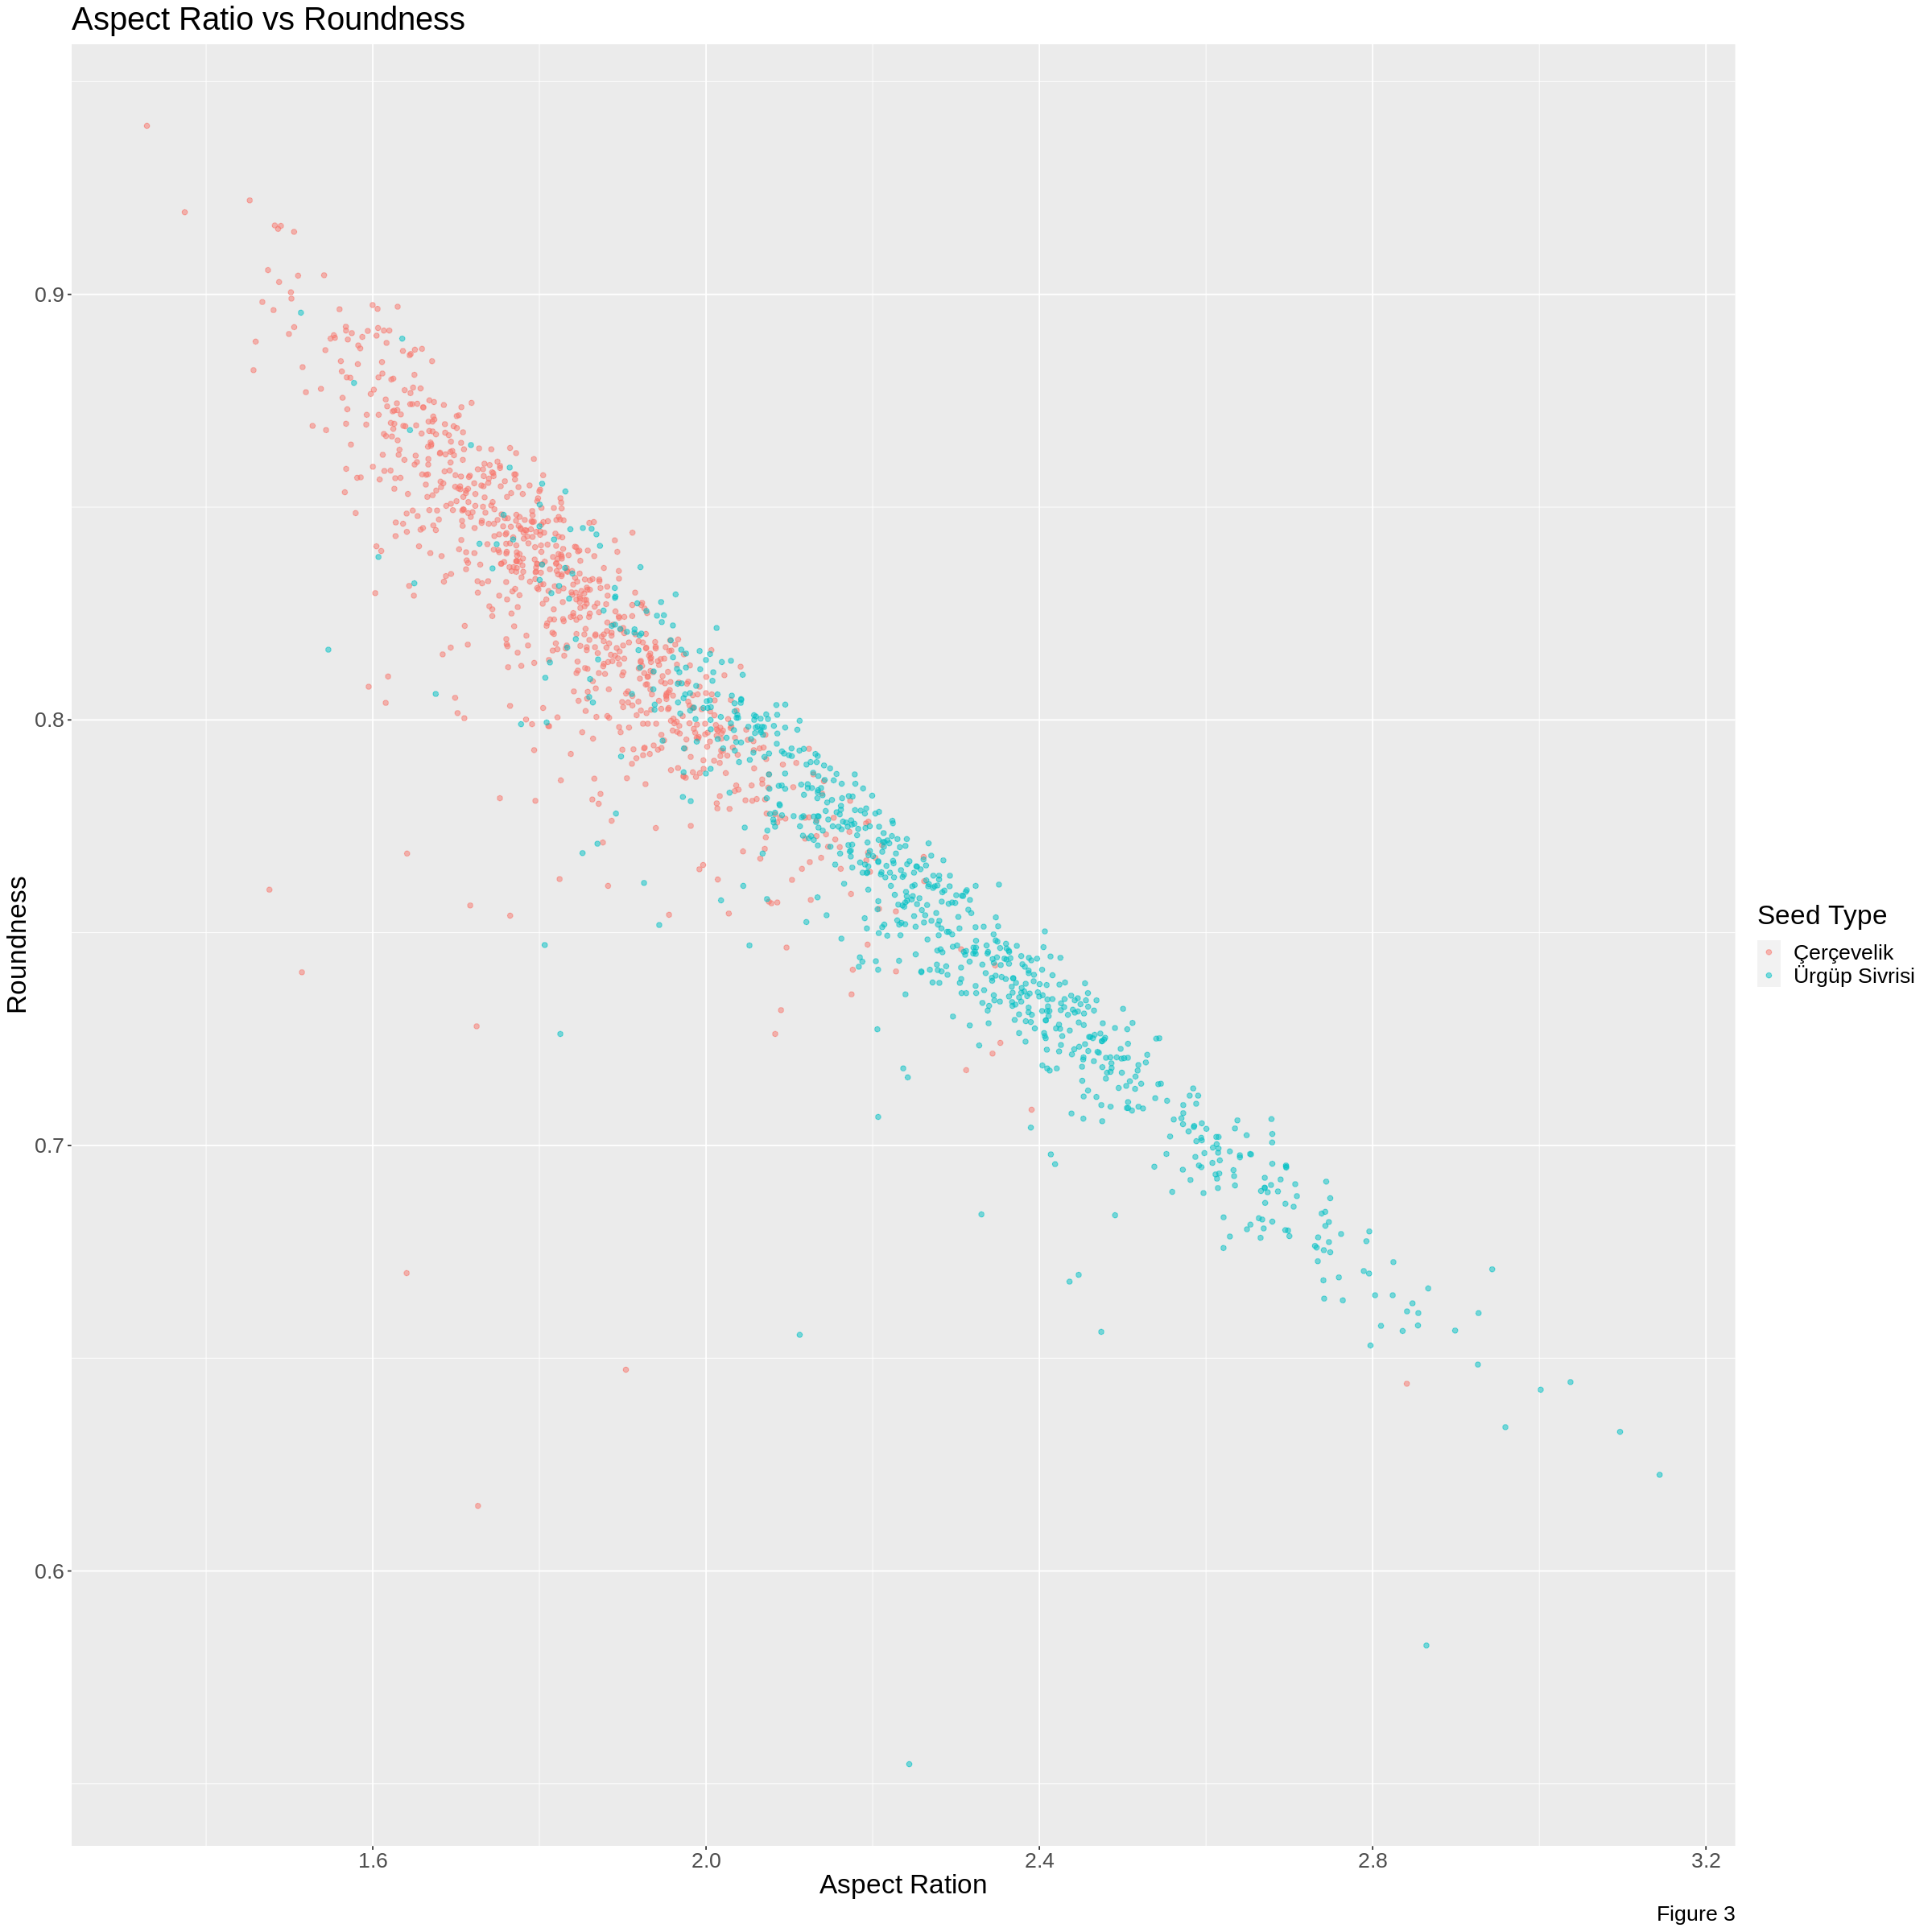

In [10]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Roundness", color = "Seed Type", title="Aspect Ratio vs Roundness", caption = "Figure 3") +
                    theme(text=element_text(size=20))

pumpkin_plot_2

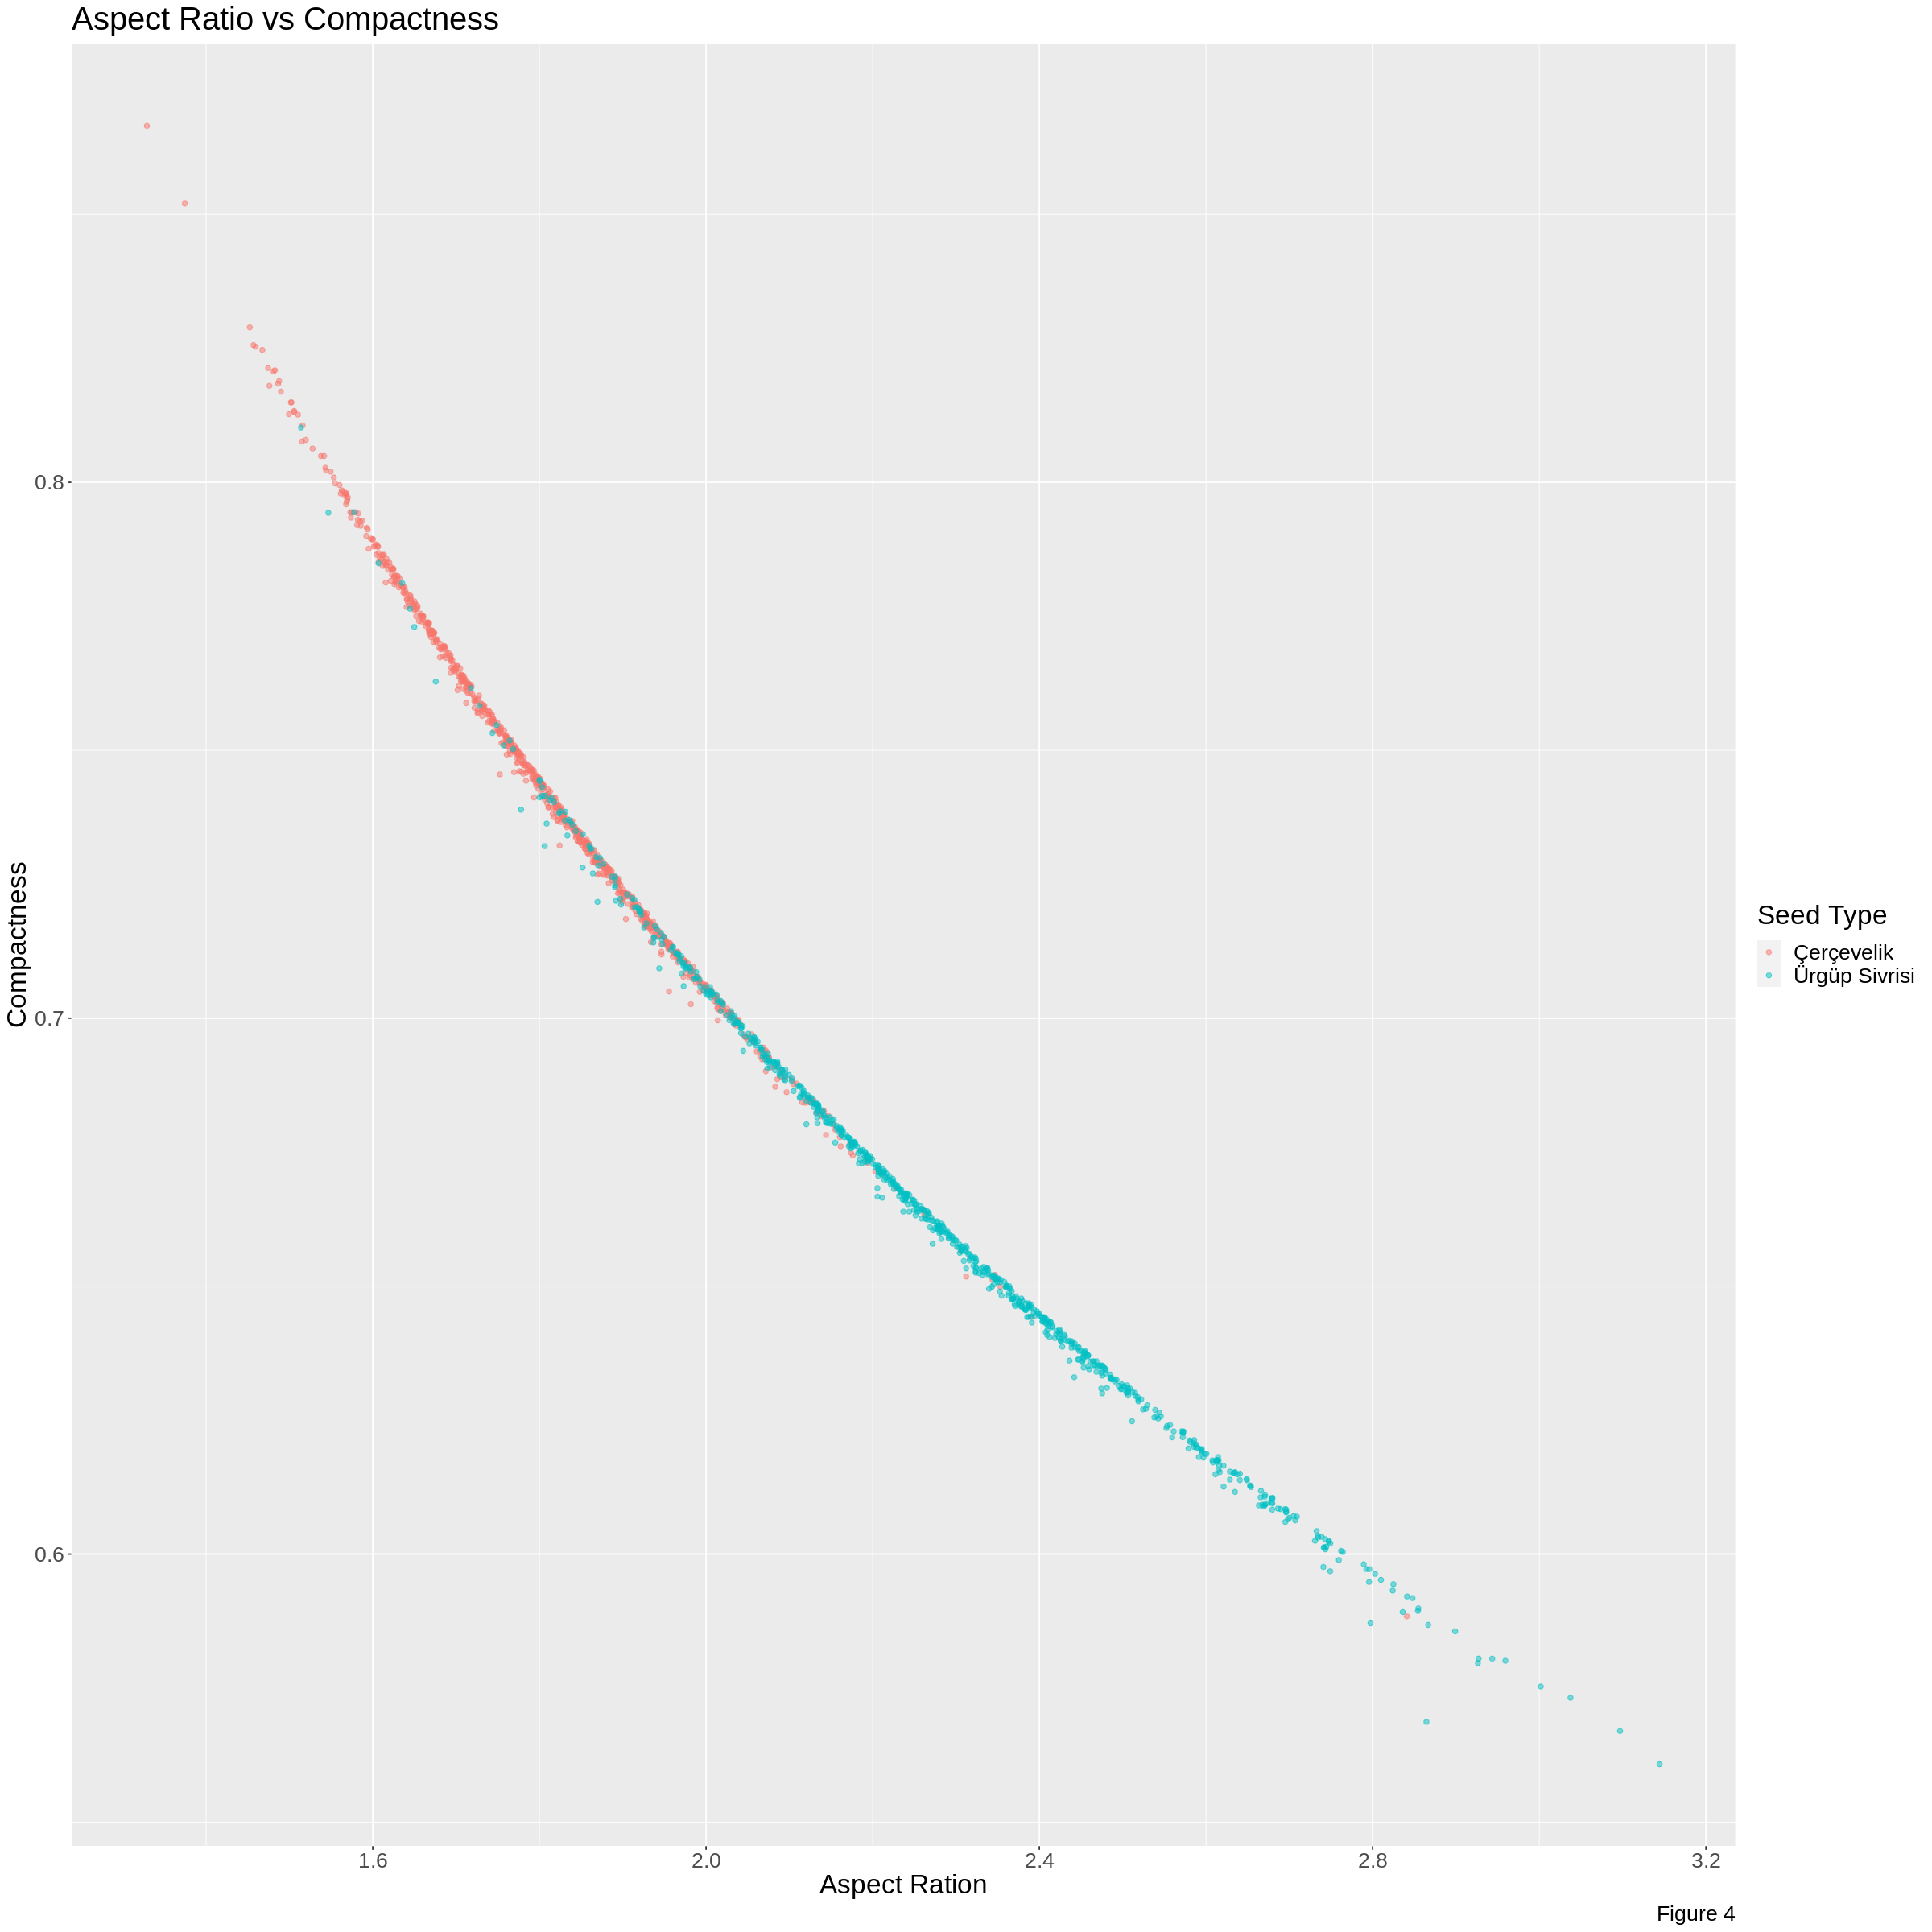

In [11]:
pumpkin_plot_3 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Compactness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Compactness", color = "Seed Type", title="Aspect Ratio vs Compactness", caption = "Figure 4") +
                    theme(text=element_text(size=20))

pumpkin_plot_3

In [12]:
# 1 is Çerçevelik
# 2 is Ürgüp Sivrisi

#AVERAGE
Just_Çerçevelik_avg <- train_pumpkin |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(mean)


Just_ÇÜrgüp_Sivrisi_avg <- train_pumpkin |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(mean)


average_pumpkin <- bind_rows(Just_Çerçevelik_avg, Just_ÇÜrgüp_Sivrisi_avg) |>
                    bind_cols(tibble(Class = c(1,2)))

average_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8318606,0.8268845,1.827448,0.7401374,1
0.8944170,0.7516924,2.285408,0.6629839,2


<div align="center"> Table 9: Pumpkin selected average value data

Table 9 suggest that the Çerçevelik seed eccentricity has an average of 0.832, roundness of 0.827, aspect ratio of 1.827 and compactness of 0.74 while Ürgüp Sivrisi has an average of 0.894 in eccentricity, 0.752 in roundness, 2.285 in aspect ratio, and 0.663 in compactness.

The analysis of the average values for the four parameters employed in differentiating between the two classes reveals a notable distinction. The calculated averages for these parameters demonstrate a substantial discrepancy between the classes, highlighting their potential efficacy in accurately distinguishing between the two.

In [13]:
#MIN
Just_Çerçevelik_min <- train_pumpkin |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(min)


Just_ÇÜrgüp_Sivrisi_min <- train_pumpkin |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(min)
min_pumpkin <- bind_rows(Just_Çerçevelik_min, Just_ÇÜrgüp_Sivrisi_min) |>
                            bind_cols(tibble(Class = c(1,2)))

min_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6586,0.6153,1.3290,0.5884,1
0.7507,0.5546,1.5138,0.5608,2


<div align="center"> Table 10: Pumpkin selected minimum value data

Table 9 suggest that the Çerçevelik seed eccentricity has an minimum value of 0.6586, roundness of 0.6153, aspect ratio of 1.3290 and compactness of 0.589 while Ürgüp Sivrisi has an minimum value of 0.7507 in eccentricity, 0.555 in roundness, 1.5138 in aspect ratio, and 0.5608 in compactness.

Upon examining the minimum values of the four parameters (eccentricity, roundness, aspect ratio, and compactness), distinct differences are observed in eccentricity, roundness, and aspect ratio, indicating notable variations in shape between the two pumpkin seed classes. However, there is only a slight dissimilarity in compactness.

In [14]:
#MAX
Just_Çerçevelik_max <- train_pumpkin |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(max)


Just_ÇÜrgüp_Sivrisi_max <- train_pumpkin |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(max)

max_pumpkin <- bind_rows(Just_Çerçevelik_max, Just_ÇÜrgüp_Sivrisi_max)  |>
                        bind_cols(tibble(Class = c(1,2)))

max_pumpkin

Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9360,0.9396,2.8410,0.8665,1
0.9481,0.8957,3.1444,0.8102,2


<div align="center"> Table 11: Pumpkin selected maximum value data

Table 9 suggest that the Çerçevelik seed eccentricity has an maximum value of 0.9360, roundness of 0.9396, aspect ratio of 2.8410 and compactness of 0.8665 while Ürgüp Sivrisi has an maximum value of 0.9481 in eccentricity, 0.8957 in roundness, 3.1444 in aspect ratio, and 0.8102 in compactness.

When analyzing the maximum values of the four parameters (eccentricity, roundness, aspect ratio, and compactness), there appears to be a relatively smaller difference in eccentricity, roundness, and aspect ratio between the two classes of pumpkin seeds. These parameters indicate only a slight variation in shape characteristics among the classes. However, a relatively more substantial difference is observed in compactness.

The average, maximum, and minimum value of each seed in Table 9 to Table 10 is used to determine the reasonability of the KNN model. The value tells us that the model will provide a reliable prediction based on the dataset. This mentioned value tells us that the model is able to make a prediction because each parameter is well spread and not at the same point or has the same value.

### Modelling

#### Modelling K-NN for tuning purposes and selecting the best K value

In [15]:
# Create the recipe
pumpkin_recipe <- recipe(Class ~ ., data = train_pumpkin) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

pumpkin_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [16]:
# Model specification initialization, with neighbors = tune()
pumpkin_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("classification")

In [17]:
# 5 folds cross validation initialization
pumpkin_vfold <- vfold_cv(train_pumpkin, v = 5, strata = Class)

In [18]:
# Create a tibble, consist of values of k to predict
pumpkin_ks <- tibble(neighbors = seq(1,101,2))

In [19]:
# Workflow initialization, to combine everything,and aggregate the mean and standard error by using the collect_metrics function
knn_results <- workflow() |>
      add_recipe(pumpkin_recipe) |>
      add_model(pumpkin_tune) |>
      tune_grid(resamples = pumpkin_vfold, grid = pumpkin_ks) |>
      collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8085397,5,0.009128750,Preprocessor1_Model01
1,roc_auc,binary,0.8082657,5,0.009162260,Preprocessor1_Model01
3,accuracy,binary,0.8559512,5,0.004768695,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,roc_auc,binary,0.9330148,5,0.007070285,Preprocessor1_Model50
101,accuracy,binary,0.8697578,5,0.004914940,Preprocessor1_Model51
101,roc_auc,binary,0.9328483,5,0.007081564,Preprocessor1_Model51


<div align="center"> Table 12: Pumpkin model knn tuning data

In [20]:
# Accuracy analysis
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8085397,5,0.009128750,Preprocessor1_Model01
3,accuracy,binary,0.8559512,5,0.004768695,Preprocessor1_Model02
5,accuracy,binary,0.8667548,5,0.004344896,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,accuracy,binary,0.8697578,5,0.005354031,Preprocessor1_Model49
99,accuracy,binary,0.8703584,5,0.005334682,Preprocessor1_Model50
101,accuracy,binary,0.8697578,5,0.004914940,Preprocessor1_Model51


<div align="center"> Table 13: Pumpkin model K value accuracy data

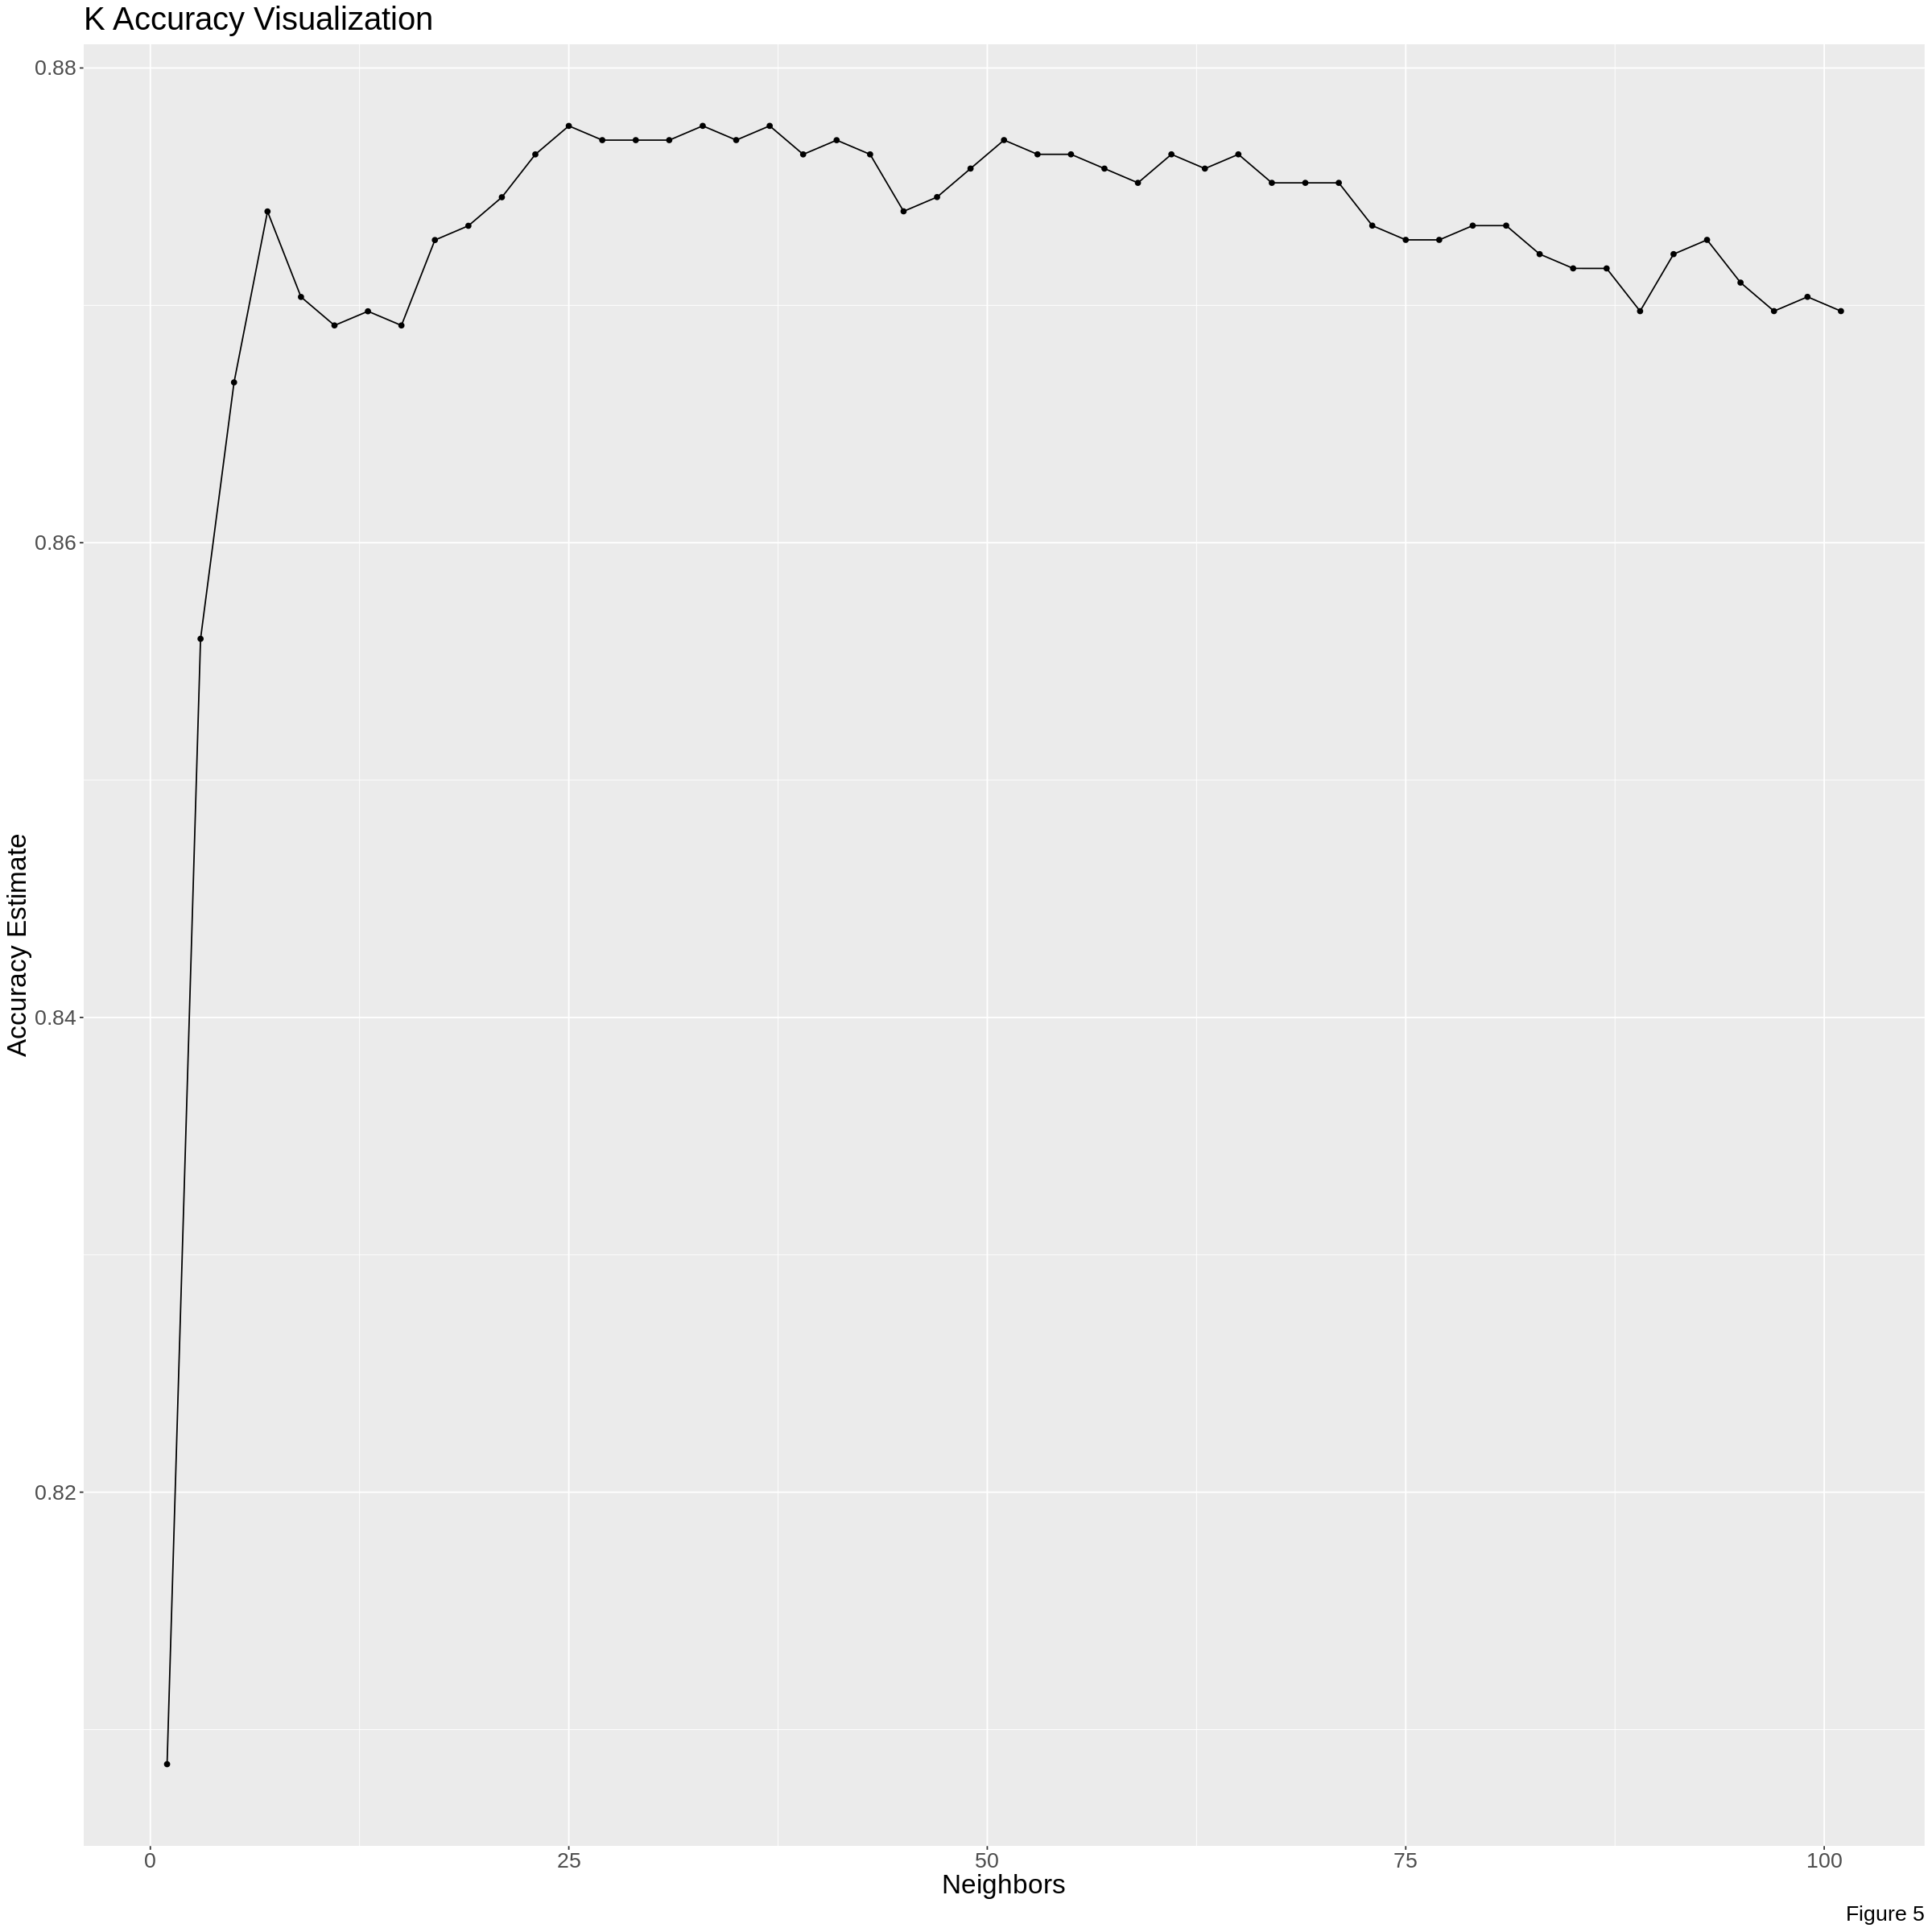

In [21]:
# Accuracy Visualization
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title="K Accuracy Visualization", caption = "Figure 5") +
      theme(text=element_text(size=20))
      #scale_x_continuous(breaks = seq(0, 101, by = 1))  # adjusting the x-axis
      #scale_y_continuous(limits = c(0, 1.0)) # adjusting the y-axis

accuracy_versus_k

In [22]:
# Best K
best_k_row <- accuracies |>
    arrange(mean) |>
    tail(n = 1) 

best_k_row

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
37,accuracy,binary,0.877562,5,0.005499307,Preprocessor1_Model19


<div align="center"> Table 14: Pumpkin model K best value accuracy data

In [23]:
# Pull K value
best_k <- best_k_row |>
    pull(neighbors)

best_k

[1] 37

From the result above, we then choose the K value of 37 for this model

#### Modelling with the best K value

In [24]:
# Initialize new spec with the best k value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
      set_engine("kknn") |>
      set_mode("classification")

In [25]:
# Combine together the recipe and new spec
pumpkin_best_fit <- workflow() |>
      add_recipe(pumpkin_recipe) |>
      add_model(knn_best_spec) |>
      fit(data = train_pumpkin)

pumpkin_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(37,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1254502
Best kernel: rectangular
Best k: 37

In [26]:
# Use the model to predict the test data, and bind the prediction column to the test data
pumpkin_test_predictions <- predict(pumpkin_best_fit , test_pumpkin) |>
      bind_cols(test_pumpkin)
pumpkin_test_predictions

.pred_class,Eccentricity,Roundness,Aspect_Ration,Compactness,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Çerçevelik,0.8187,0.8338,1.7413,0.7557,Çerçevelik
Çerçevelik,0.8215,0.8480,1.7535,0.7522,Çerçevelik
Çerçevelik,0.8646,0.7957,1.9903,0.7067,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮
Ürgüp Sivrisi,0.8863,0.7626,2.1594,0.6774,Ürgüp Sivrisi
Ürgüp Sivrisi,0.9340,0.6672,2.7996,0.5973,Ürgüp Sivrisi
Ürgüp Sivrisi,0.8990,0.7549,2.2828,0.6599,Ürgüp Sivrisi


<div align="center"> Table 15: Pumpkin test prediction results with best K value

In [27]:
# Accuracy data analysis
pumpkin_prediction_accuracy <- pumpkin_test_predictions |>
        metrics(truth = Class, estimate = .pred_class)   

pumpkin_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8717026
kap,binary,0.7420435


<div align="center"> Table 16: Pumpkin model accuracy on training data with best K value

In [28]:
# Confusion matrix analysis
pumpkin_mat <- pumpkin_test_predictions |> 
      conf_mat(truth = Class, estimate = .pred_class)

pumpkin_mat

               Truth
Prediction      Çerçevelik Ürgüp Sivrisi
  Çerçevelik           399            72
  Ürgüp Sivrisi         35           328

<div align="center"> Table 17: Pumpkin model K confusion matrix results

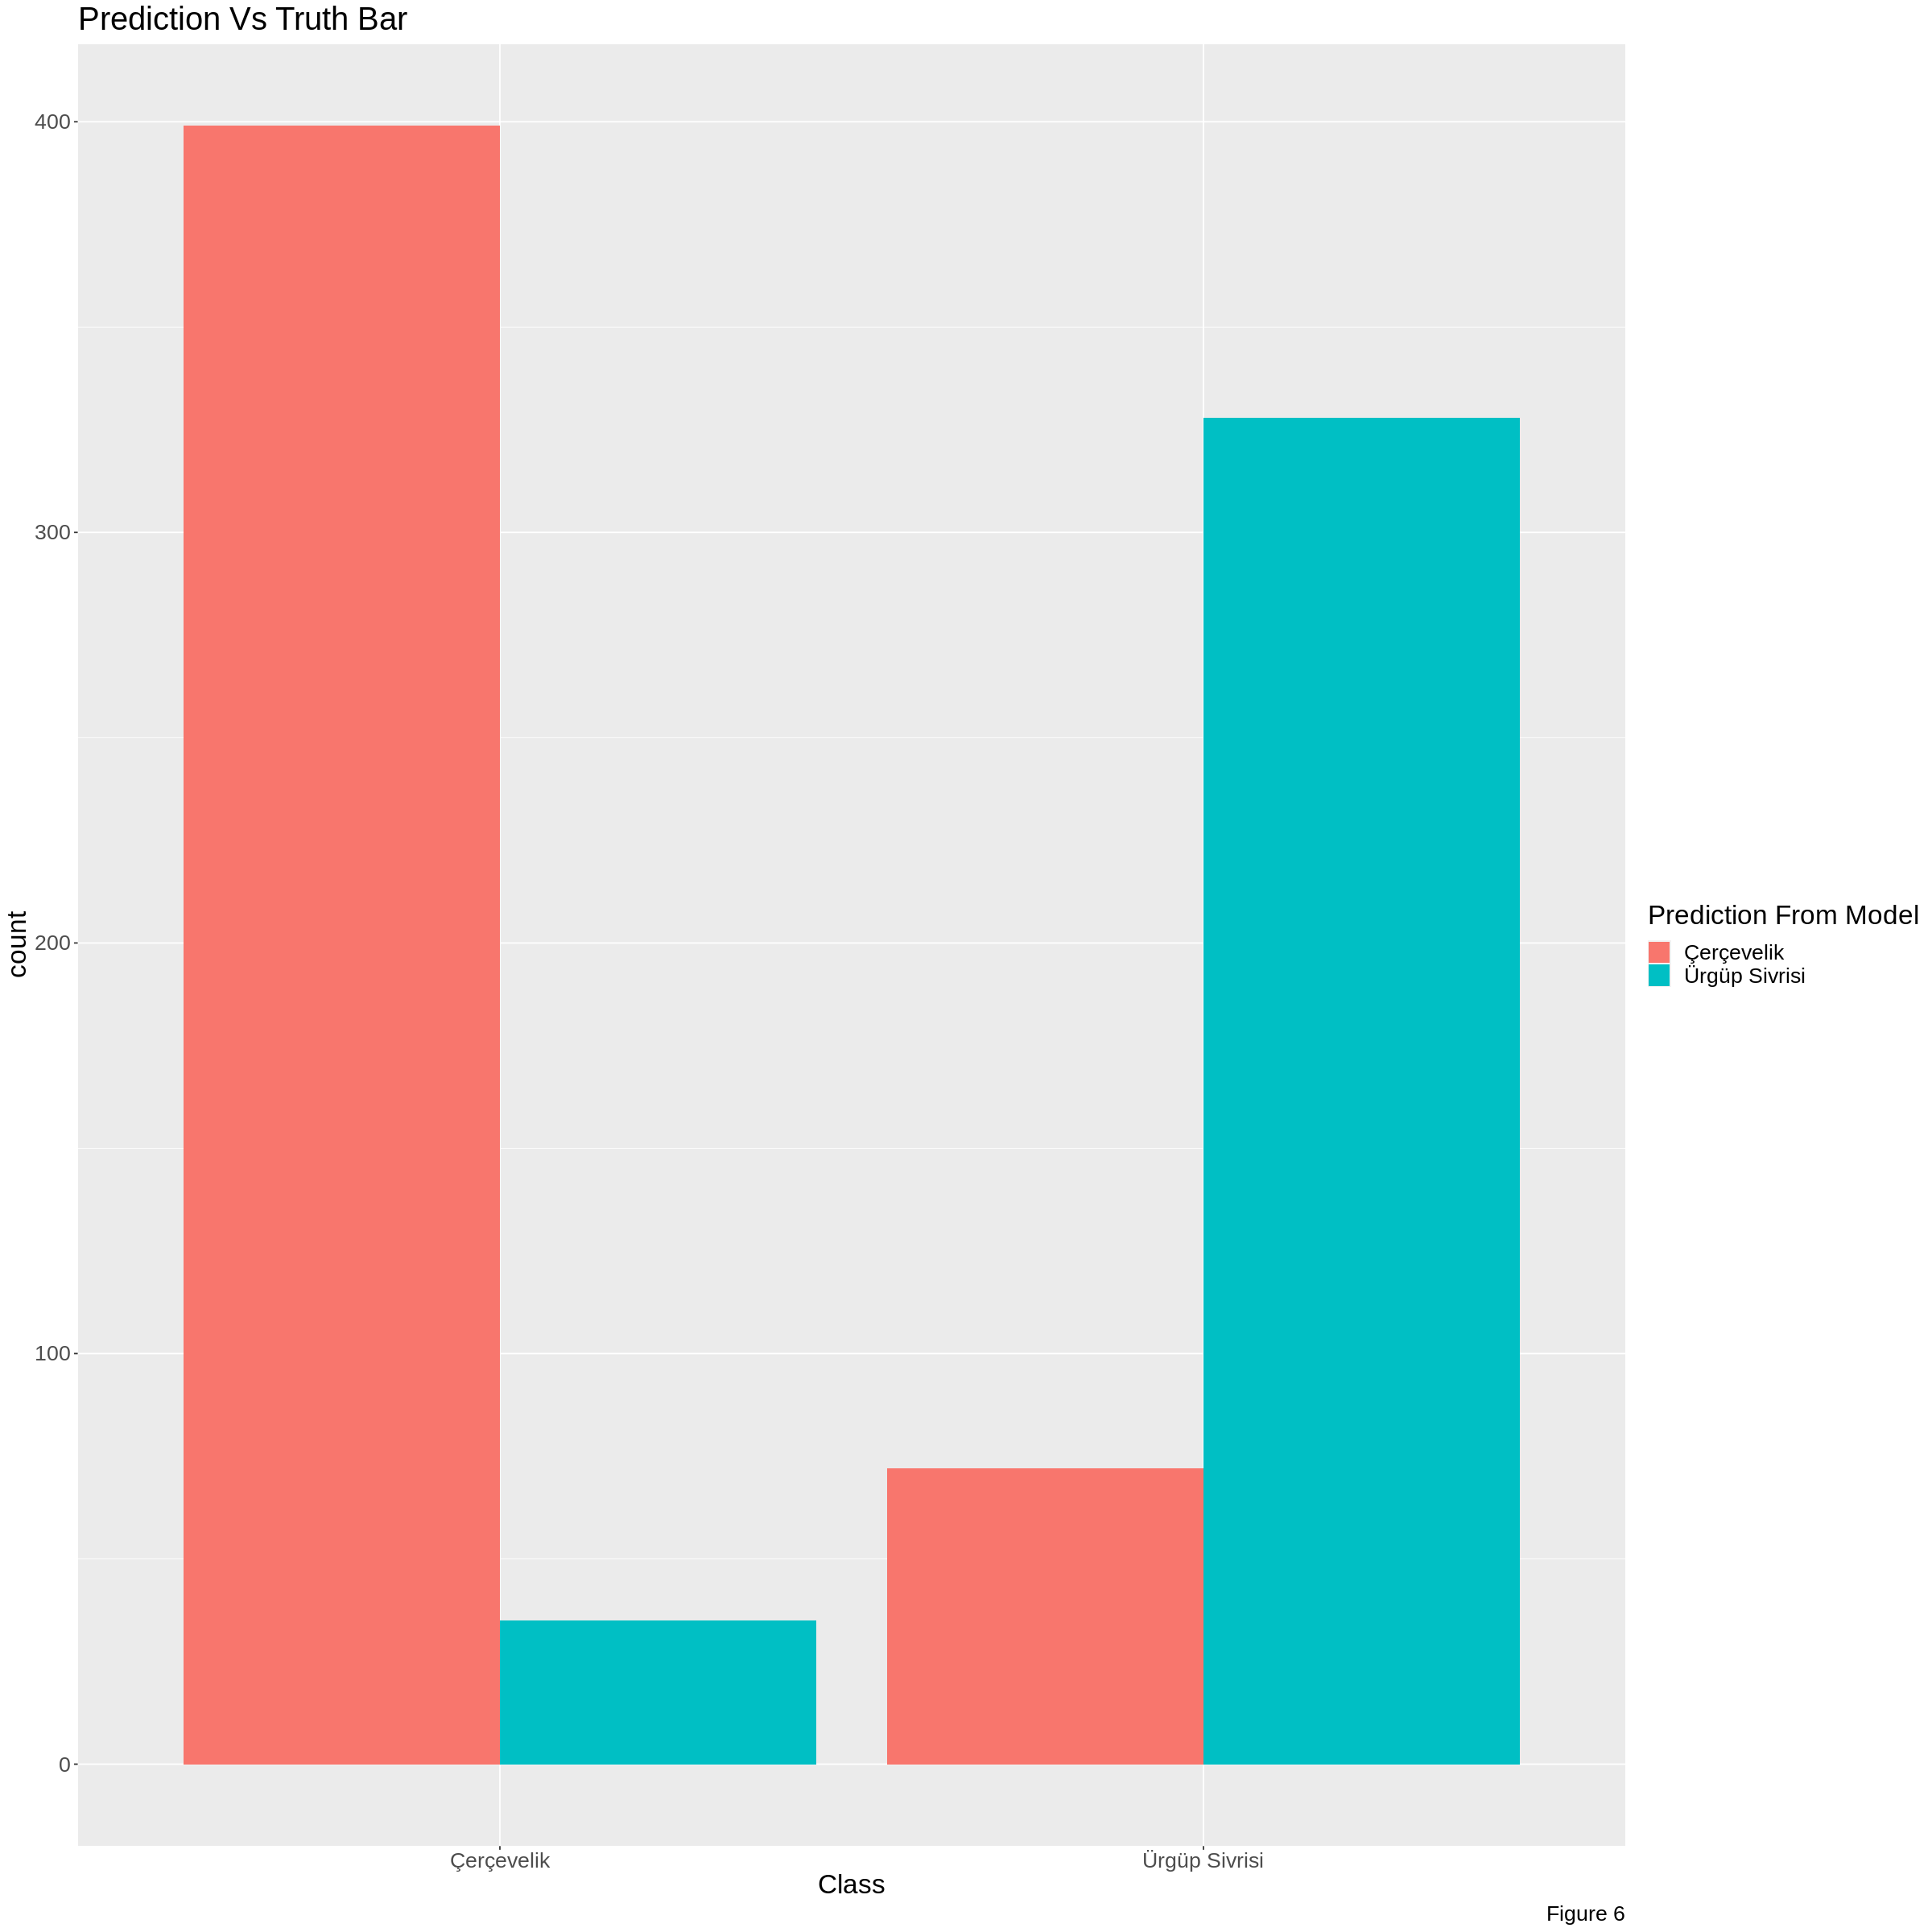

In [29]:
# Visualization of the model accuracy for each class
pumpkin_bar <- ggplot(pumpkin_test_predictions, aes(x = Class, fill = .pred_class)) +
                    geom_bar(position = "dodge") +
                    labs(x = "Class", fill = "Prediction From Model", title = "Prediction Vs Truth Bar", caption = "Figure 6") +
                    theme(text=element_text(size=20))

pumpkin_bar

From the visualization and data accuracy and confusion analysis above, we can conclude that the model have an accuracies of 87.17026 %. Further discussion will be discussed in the next section.

## Discussion

In this study, we utilized eccentricity, roundness, aspect ratio, and compactness as parameters to predict the class of pumpkin seeds. By visually selecting these parameters using ggpairs in the previous section, we achieved an accuracy of 87.17026%. This high accuracy demonstrates the effectiveness of the KNN algorithm for accurately identifying the class of pumpkin seeds in the field of agriculture.

Before initiating our analysis using the KNN algorithm, we conducted an initial step of calculating the average, minimum, and maximum values for each predictor. This preliminary exploration aimed to assess the suitability of the KNN algorithm for our specific problem. Typically, KNN performs well when there are distinct differences between the two classes in terms of the average, minimum, and maximum values of each predictor.

Analyzing the average values of the four parameters used to differentiate between the seed classes revealed a significant distinction. The calculated averages demonstrated a substantial discrepancy between the classes, indicating the potential of these parameters to accurately distinguish between the seed classes. When examining the minimum values of the four parameters (eccentricity, roundness, aspect ratio, and compactness), we observed clear differences in eccentricity, roundness, and aspect ratio. These differences indicated notable variations in shape characteristics between the two classes of pumpkin seeds. However, the dissimilarity in compactness was only slight. On the other hand, when analyzing the maximum values of the parameters, we noticed a relatively smaller difference in eccentricity, roundness, and aspect ratio between the two classes. These parameters indicated only slight variations in shape characteristics among the classes. However, a more substantial difference was observed in compactness.

These findings suggest that the parameters exhibit distinct characteristics that can potentially aid in accurately distinguishing between the seed classes. The variations observed in the minimum and maximum values of the predictors further contribute to our understanding of the unique features of the different pumpkin seed classes.

These findings have significant implications for the agriculture industry, as they open up possibilities for automating seed classification using the KNN algorithm. Since the physical characteristics of each seed can be measured, implementing the KNN algorithm for automated seed classification is entirely feasible. Although our study focused on two types of pumpkin seeds (Çerçevelik and Ürgüp Sivrisi) and achieved high accuracy with the selected parameters, there is potential to expand this approach to include more types of pumpkin seeds and even extend it to classify seeds from other species.

These findings also give rise to important questions for future research. Firstly, it would be interesting to investigate whether incorporating additional types of pumpkin seeds into the dataset would maintain a high accuracy using the same method. Additionally, exploring the performance of this method on seeds from other species would be valuable. Answering these questions will require further research and data collection to gain a deeper understanding of the algorithm's effectiveness and any potential limitations in diverse seed classification scenarios.


## References
Batista, G. E. A. P. A., & Silva, D. F. (2009, August). How k-nearest neighbor parameters affect its performance. In Argentine symposium on artificial intelligence (pp. 1-12).

Joseph, V. R. (2022). Optimal ratio for data splitting. Statistical Analysis and Data Mining, 15(4), 531-538. https://doi.org/10.1002/sam.11583 

KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0


